In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [132]:
df = pd.read_csv("urgency_classification_cleaned_dataset.csv")
df

,expiryDaysLeft,quantityKg,donationTimeHour,recipientDemandScore,distanceToRecipientKm,urgencyLevel,storageType_Refrigerated,storageType_RoomTemp,foodCategory_Dairy,foodCategory_Fruits,foodCategory_Meat,foodCategory_PreparedMeals,foodCategory_Vegetables
0,0.024222,-0.923251,1.475950,0.275858,1.817388,0,True,False,True,False,False,False,False
1,0.487804,0.393335,-0.829997,-0.990515,1.135668,1,False,False,True,False,False,False,False
2,-1.598315,0.566292,1.187707,0.099973,-0.170242,0,True,False,False,False,False,False,True
3,0.024222,1.127518,-0.397632,0.486921,-0.052308,2,False,False,False,False,False,False,False
4,0.719595,-0.987492,1.620072,-0.814630,-0.144354,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.487804,-1.511656,-1.262362,-1.236755,0.582670,1,False,False,False,False,False,False,True
1996,1.646760,1.508728,-1.694727,-0.709099,1.137107,1,False,True,False,True,False,False,False
1997,-1.134733,0.221085,0.467098,-1.271932,-0.388134,0,False,False,False,False,False,True,False
1998,0.951386,-1.206688,-1.118240,-0.005558,-0.273795,0,False,False,False,False,True,False,False


<h1>Feature Selection</h1>

In [135]:
X = df.drop('urgencyLevel', axis=1)
y = df['urgencyLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
print(X_train.columns.tolist())
print(X_train.dtypes)


['expiryDaysLeft', 'quantityKg', 'donationTimeHour', 'recipientDemandScore', 'distanceToRecipientKm', 'storageType_Refrigerated', 'storageType_RoomTemp', 'foodCategory_Dairy', 'foodCategory_Fruits', 'foodCategory_Meat', 'foodCategory_PreparedMeals', 'foodCategory_Vegetables']
expiryDaysLeft                float64
quantityKg                    float64
donationTimeHour              float64
recipientDemandScore          float64
distanceToRecipientKm         float64
storageType_Refrigerated         bool
storageType_RoomTemp             bool
foodCategory_Dairy               bool
foodCategory_Fruits              bool
foodCategory_Meat                bool
foodCategory_PreparedMeals       bool
foodCategory_Vegetables          bool
dtype: object


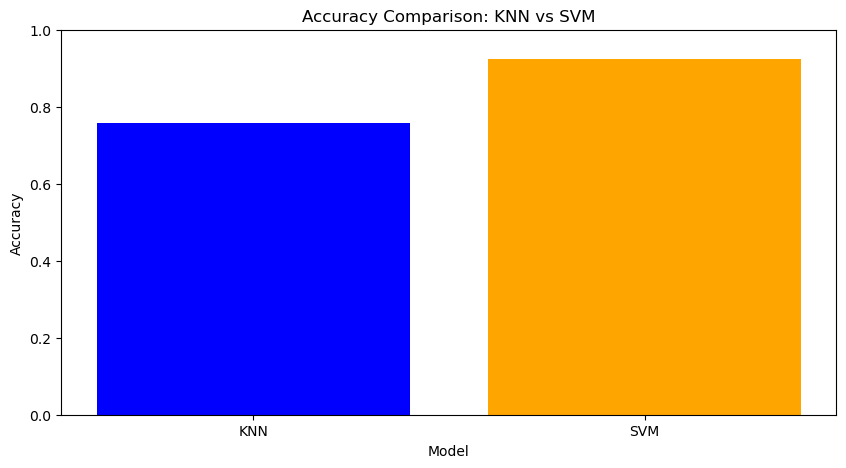

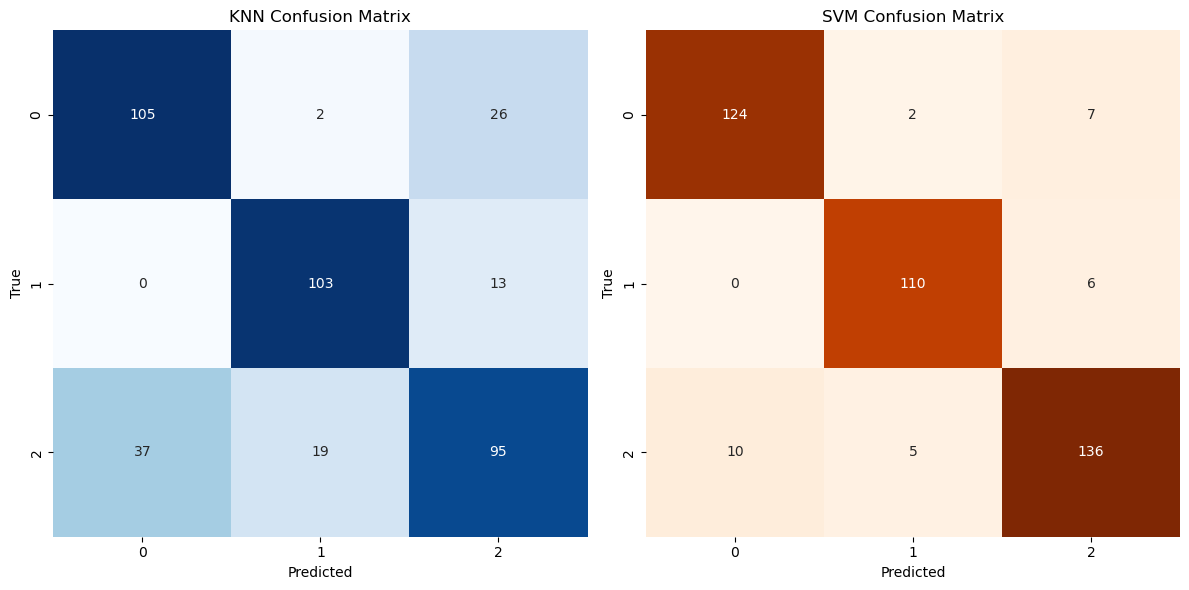

In [139]:
# ---- KNN ----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_confusion = confusion_matrix(y_test, y_pred_knn)

# ---- SVM ----
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

# Plotting accuracy comparison
models = ['KNN', 'SVM']
accuracies = [knn_accuracy, svm_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs SVM')
plt.ylim([0, 1])
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# KNN confusion matrix
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM confusion matrix
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Oranges', ax=axes[1], cbar=False)
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()


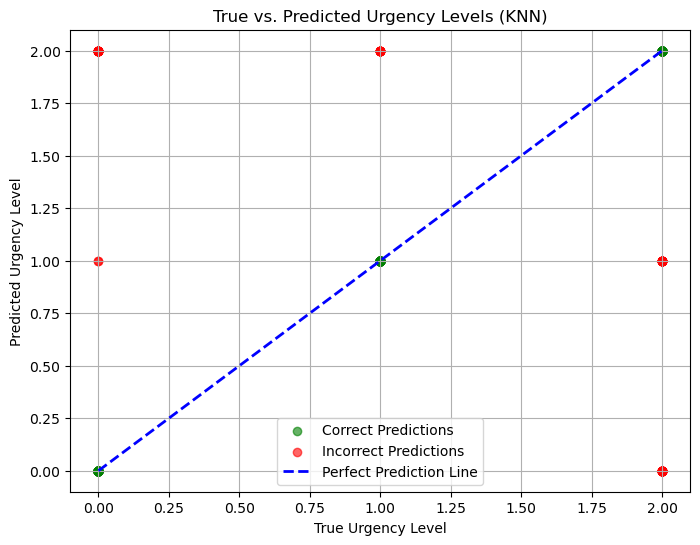

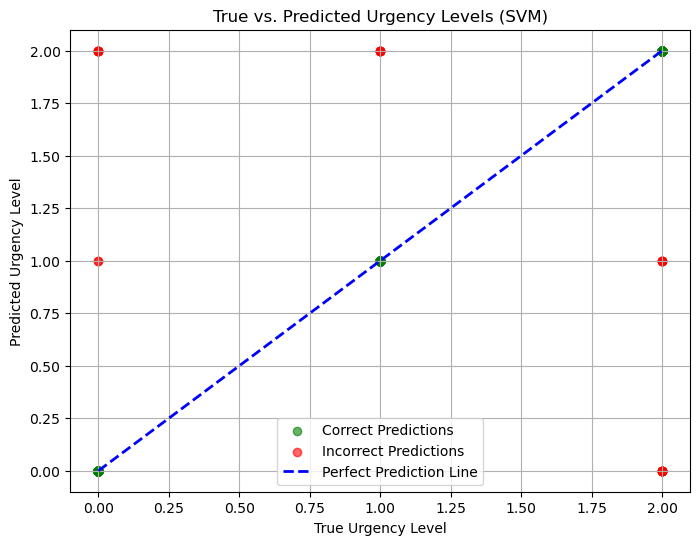

In [145]:
def plot_prediction_quality(y_true, y_pred, model_name):
    # Identify correct and incorrect predictions
    correct = y_true == y_pred
    incorrect = ~correct
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    # Plot correct predictions in green
    plt.scatter(y_true[correct], y_pred[correct], color='green', label='Correct Predictions', alpha=0.6)
    # Plot incorrect predictions in red
    plt.scatter(y_true[incorrect], y_pred[incorrect], color='red', label='Incorrect Predictions', alpha=0.6)
    # Plot diagonal line for perfect predictions
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='blue', lw=2, linestyle='--', label='Perfect Prediction Line')
    
    plt.xlabel('True Urgency Level')
    plt.ylabel('Predicted Urgency Level')
    plt.title(f'True vs. Predicted Urgency Levels ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for KNN
plot_prediction_quality(y_test, y_pred_knn, "KNN")

# Plot for SVM
plot_prediction_quality(y_test, y_pred_svm, "SVM")

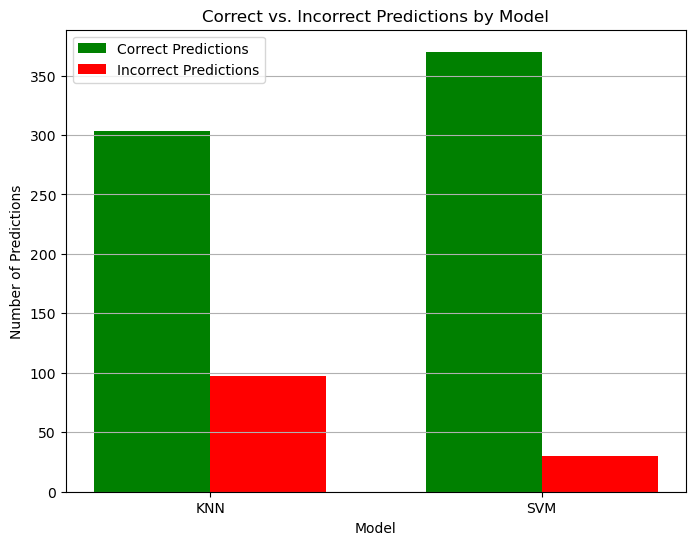

KNN Accuracy: 75.75%
SVM Accuracy: 92.50%


In [147]:
# Calculate correct and incorrect prediction counts
knn_correct = sum(y_test == y_pred_knn)
knn_incorrect = len(y_test) - knn_correct
svm_correct = sum(y_test == y_pred_svm)
svm_incorrect = len(y_test) - svm_correct

# Data for bar plot
models = ['KNN', 'SVM']
correct_counts = [knn_correct, svm_correct]
incorrect_counts = [knn_incorrect, svm_incorrect]

# Create bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, correct_counts, bar_width, label='Correct Predictions', color='green')
plt.bar(index + bar_width, incorrect_counts, bar_width, label='Incorrect Predictions', color='red')

plt.xlabel('Model')
plt.ylabel('Number of Predictions')
plt.title('Correct vs. Incorrect Predictions by Model')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Print accuracy for reference
print(f"KNN Accuracy: {knn_correct / len(y_test):.2%}")
print(f"SVM Accuracy: {svm_correct / len(y_test):.2%}")

In [119]:
# Save the SVM model
joblib.dump(svm, 'urgencey_transportation_model.pkl')
print("SVM model saved successfully.")

SVM model saved successfully.
